# ROS task 2.2

#### Topics avalable
- /center_depth
- /center_rgb
- /device_0/sensor_0/Depth_0/image/data_1
- /device_0/sensor_0/Depth_0/image/data_2
- /device_0/sensor_0/Depth_0/image/data_3
- /device_0/sensor_1/Color_0/image/data_1
- /device_0/sensor_1/Color_0/image/data_2
- /device_0/sensor_1/Color_0/image/data_3
- /rosout
- /rosout_agg
- /sysInfo

In [2]:
# Imports 
import numpy as np
import cv2
import matplotlib.pyplot as plt

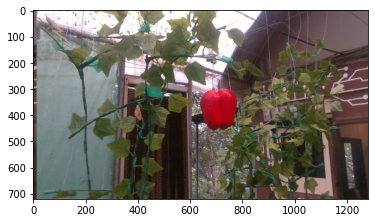

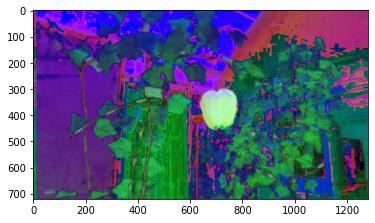

In [7]:
# import the image to be processed
img = cv2.imread('new4.jpg')

# show the image
plt.imshow(img)

# convert the image to RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show the image
plt.imshow(rgb)
plt.show()

# convert the image to HSV
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

# show the image
plt.imshow(hsv)

# show all the images
plt.show()

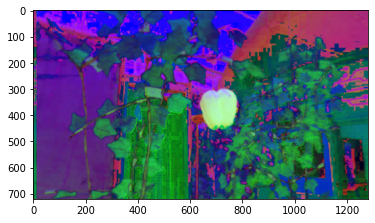

In [8]:
# Remove noise from the image
# define the kernel size
kernel_size = 5
blur_gray = cv2.GaussianBlur(hsv, (kernel_size, kernel_size), 0)

# show the image
plt.imshow(blur_gray)

# show all the images
plt.show()

#### use HSV color space to filter the color of the object

In [53]:
# get the lower and upper bounds of the color to be detected
green = np.uint8([[[192,15,41 ]]]) # put your color here
hsv_green = cv2.cvtColor(green,cv2.COLOR_RGB2HSV)
print( hsv_green )

[[[176 235 192]]]


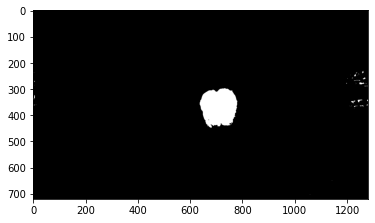

In [9]:
# Filter the image using blue color
# define range of blue color in HSV
lower_blue = np.array([166,100,100])
upper_blue = np.array([186,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(blur_gray, lower_blue, upper_blue)

# save the dimentions of the mask in variable
height, width = mask.shape

# create an image with the same dimentions as the mask
mask_image = np.zeros((height, width, 3), np.uint8)

# fill the image with the color white
mask_image[:] = (255, 255, 255)

# Bitwise-AND mask and masked image
res = cv2.bitwise_and(mask_image,mask_image, mask= mask)

# show the image
plt.imshow(res)
plt.show()



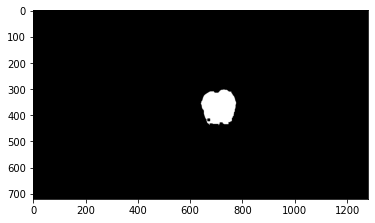

In [10]:
# use Morphological Transformations to remove noise
# define the kernel size
kernel = np.ones((5,5),np.uint8)

# apply the erosion
erosion = cv2.erode(res,kernel,iterations = 2)

# show the image
plt.imshow(erosion)
plt.show()

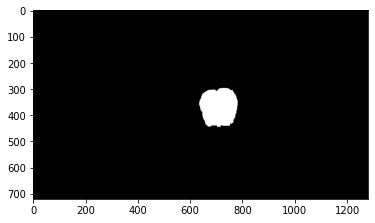

In [11]:
# apply dilation
dilation = cv2.dilate(erosion,kernel,iterations = 3)

# show the image
plt.imshow(dilation)
plt.show()

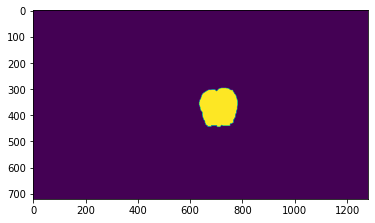

In [12]:
# create a mask from the image
mask = cv2.inRange(dilation, (254,254,254), (255,255,255))

# show the image
plt.imshow(mask)
plt.show()

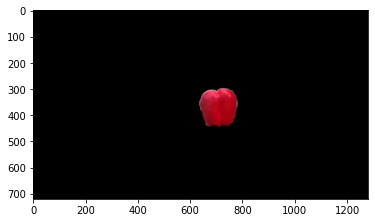

In [13]:
# combine the images bitwise
res = cv2.bitwise_and(rgb, rgb, mask= mask)

# show the image
plt.imshow(res)
plt.show()

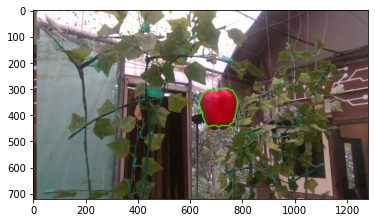

In [14]:
# find the contours in the mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(rgb,contours,-1,(0,255,0),3)

# display the image
plt.imshow(rgb)
plt.show()

In [95]:
# function to do the image processing for any image
def process_image(image):
    # convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # convert the image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Remove noise from the image
    # define the kernel size
    kernel_size = 5
    hsv = cv2.GaussianBlur(hsv, (kernel_size, kernel_size), 0)

    # Filter the image using blue color
    # define two blue boundaries, one for red and one for golden yellow
    # for red
    blueLower1 = np.array([166,100,100])
    blueUpper1 = np.array([186,255,255])
    # for golden yellow
    blueLower2 = np.array([0,100,100])
    blueUpper2 = np.array([18,255,255])
    # Threshold the HSV image to get only blue colors
    mask1 = cv2.inRange(hsv, blueLower1, blueUpper1)
    mask2 = cv2.inRange(hsv, blueLower2, blueUpper2)
    # combine the two masks
    mask = mask1 | mask2
    # show the image
    plt.imshow(mask)
    plt.show()

    # save the dimentions of the mask in variable
    height, width = mask.shape
    # create an image with the same dimentions as the mask
    mask_image = np.zeros((height, width, 3), np.uint8)
    # fill the image with the color white
    mask_image[:] = (255, 255, 255)
    # Bitwise-AND mask and masked image
    res = cv2.bitwise_and(mask_image,mask_image, mask= mask)

    # use Morphological Transformations to remove noise
    # define the kernel size
    kernel = np.ones((5,5),np.uint8)
    # apply the erosion
    erosion = cv2.erode(res,kernel,iterations = 5)
    # apply dilation
    dilation = cv2.dilate(erosion,kernel,iterations = 5)

    # create a mask from the image
    mask = cv2.inRange(dilation, (254,254,254), (255,255,255))
    # combine the images bitwise
    res = cv2.bitwise_and(image, image, mask= mask)
    
    # show the image
    plt.imshow(res)
    plt.show()
    
    # find the contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # get the center of each contour
    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # drow a circle on the center
        cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)
        # write a text for centroid
        cv2.putText(image, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        print("centroid: ", cX, cY)
    cv2.drawContours(image,contours,-1,(0,255,0),3)
    return image

In [85]:
# function to do the image processing for any image for red color
def process_image_red(image):
    # convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # convert the image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Remove noise from the image
    # define the kernel size
    kernel_size = 5
    hsv = cv2.GaussianBlur(hsv, (kernel_size, kernel_size), 0)

    # show the image
    plt.imshow(hsv)
    plt.show()
    
    # print the value at position
    print("value at position: ", hsv[331][197])
    # Filter the image using blue color
    # define two blue boundaries, one for red and one for golden yellow
    # for red
    blueLower = np.array([166,100,100])
    blueUpper = np.array([196,255,255])

    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, blueLower, blueUpper)

    plt.imshow(mask)
    plt.show()

    # save the dimentions of the mask in variable
    height, width = mask.shape
    # create an image with the same dimentions as the mask
    mask_image = np.zeros((height, width, 3), np.uint8)
    # fill the image with the color white
    mask_image[:] = (255, 255, 255)
    # Bitwise-AND mask and masked image
    res = cv2.bitwise_and(mask_image,mask_image, mask= mask)

    # use Morphological Transformations to remove noise
    # define the kernel size
    kernel = np.ones((5,5),np.uint8)
    # apply the erosion
    erosion = cv2.erode(res,kernel,iterations = 5)
    # apply dilation
    dilation = cv2.dilate(erosion,kernel,iterations = 5)

    # create a mask from the image
    mask = cv2.inRange(dilation, (254,254,254), (255,255,255))
    # combine the images bitwise
    res = cv2.bitwise_and(image, image, mask= mask)
    
    # show the image
    plt.imshow(res)
    plt.show()
    
    # find the contours in the mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # get the center of each contour
    for c in contours:
        # calculate moments for each contour
        M = cv2.moments(c)
        # calculate x,y coordinate of center
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        # drow a circle on the center
        cv2.circle(image, (cX, cY), 5, (255, 255, 255), -1)
        # write a text for centroid
        cv2.putText(image, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
        print("centroid: ", cX, cY)
    cv2.drawContours(image,contours,-1,(0,255,0),3)
    return image

In [50]:
# display the image
cv2.destroyAllWindows()

## part 1 Completed
- - -

#### Next find the centeroid of the object

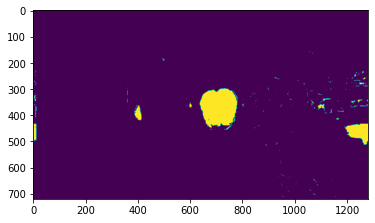

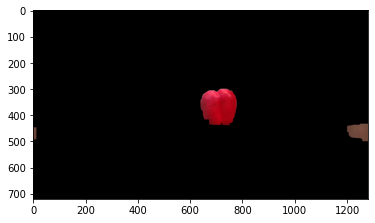

centroid:  6 469
centroid:  1244 462
centroid:  710 368


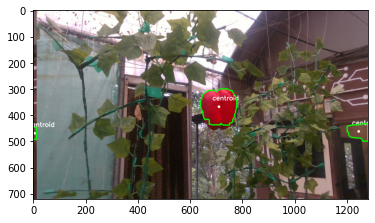

In [88]:
# get the image to be processed
img = cv2.imread('new4.jpg')

# process the image
img = process_image(img)

# display the image
plt.imshow(img)
plt.show()

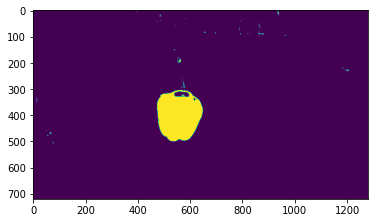

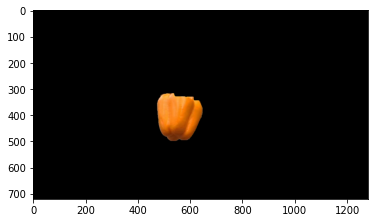

centroid:  555 404


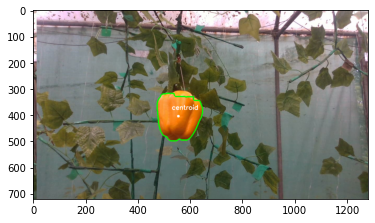

In [89]:
# get the image to be processed
img = cv2.imread('new3.jpg')

# process the image
img = process_image(img)

# display the image
plt.imshow(img)
plt.show()

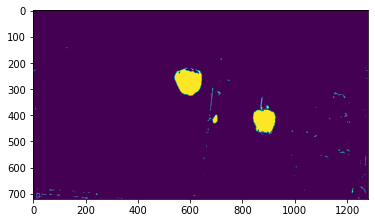

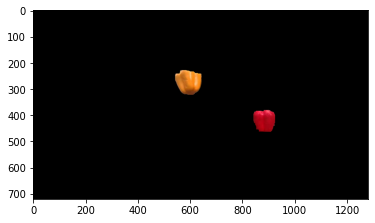

centroid:  883 420
centroid:  594 273


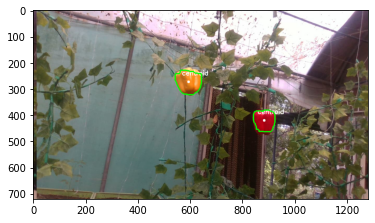

In [91]:
# get the image to be processed
img = cv2.imread('new.jpg')

# process the image
img = process_image(img)

# display the image
plt.imshow(img)
plt.show()

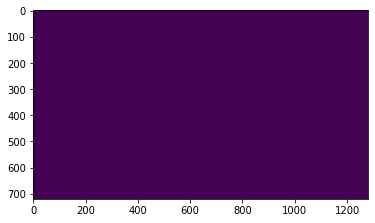

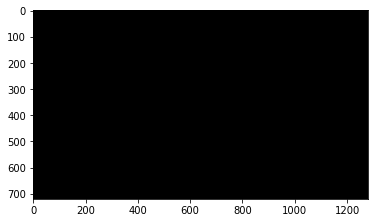

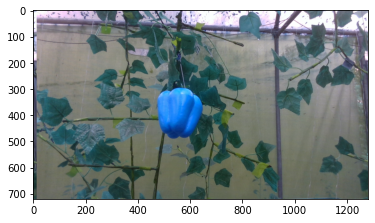

In [92]:
img = cv2.imread('original13.png')
img = process_image(img)
plt.imshow(img)
plt.show()

---
### Optimisee the code for better detection of the object


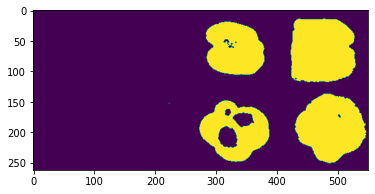

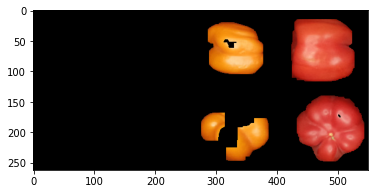

centroid:  354 212
centroid:  294 189
centroid:  488 191
centroid:  502 173
centroid:  331 63
centroid:  323 54
centroid:  473 65


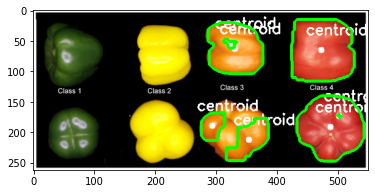

In [96]:
# get the image to be processed
img = cv2.imread('4.jpg')

# process the image
img = process_image(img)

# display the image
plt.imshow(img)
plt.show()

### Object Tracking
Now that we know how to convert a BGR image to HSV, we can use this to extract a colored object. In HSV, it is easier to represent a color than in BGR color-space. In our application, we will try to extract a blue colored object. So here is the method:

- Take each frame of the video
- Convert from BGR to HSV color-space
- We threshold the HSV image for a range of blue color
- Now extract the blue object alone, we can do whatever we want on that image

In [ ]:
import cv2 as cv
import numpy as np
cap = cv.VideoCapture(0)
while(1):
    # Take each frame
    _, frame = cap.read()
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

#### How to find HSV values to track?

In [19]:
green = np.uint8([[[0,255,0 ]]]) # put your color here
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


#### Now you take [H-10, 100,100] and [H+10, 255, 255] as the lower bound and upper bound respectively. Apart from this method, you can use any image editing tools like GIMP or any online converters to find these values, but don't forget to adjust the HSV ranges.

### Scaling
Scaling is just resizing of the image. OpenCV comes with a function cv.resize() for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes. You can resize an input image with either of following methods:

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('messi5.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

#OR

height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

#### Opening Morphological Transformations
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv2.morphologyEx()

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel

### Countors
Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.

- 

In [ ]:
# code for countour detection
import numpy as np
import cv2

im = cv2.imread('test.jpg',cv2.IMREAD_COLOR)
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for data in contours:
    print "The contours have this data %r" %data
cv2.drawContours(im,contours,-1,(0,255,0),3)
cv2.imshow('output',im)
while True:
    if cv2.waitKey(6) & 0xff == 27:
        break